In [26]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [27]:
#importing the credit classification dataset
df = pd.read_csv('./train.csv')

In [28]:
#taking a look at the number of rows and columns
df.shape

(100000, 28)

In [29]:
df.head()

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620              265.0   
1            809.98                 31.944960              266.0   
2            809.98                 28.609352              267.0   
3            809.98                 31.377862              268.0   
4            809.98                 24.797347              269.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                 21.46538   
1                     No            49.574949                 21.46538   
2                     No            49.574949                 21.46538   
3                     No            49.574949                 21.46538   
4                     No            49.574949                 21.46538   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  

[5 rows x 28 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [31]:
df.describe().transpose()

count          mean           std           min  \
ID                        100000.0  8.063150e+04  4.330149e+04   5634.000000   
Customer_ID               100000.0  2.598267e+04  1.434054e+04   1006.000000   
Month                     100000.0  4.500000e+00  2.291299e+00      1.000000   
Age                       100000.0  3.331634e+01  1.076481e+01     14.000000   
SSN                       100000.0  5.004617e+08  2.908267e+08  81349.000000   
Annual_Income             100000.0  5.050512e+04  3.829942e+04   7005.930000   
Monthly_Inhand_Salary     100000.0  4.197271e+03  3.186432e+03    303.645417   
Num_Bank_Accounts         100000.0  5.368820e+00  2.593314e+00      0.000000   
Num_Credit_Card           100000.0  5.533570e+00  2.067098e+00      0.000000   
Interest_Rate             100000.0  1.453208e+01  8.741330e+00      1.000000   
Num_of_Loan               100000.0  3.532880e+00  2.446356e+00      0.000000   
Delay_from_due_date       100000.0  2.108141e+01  1.480456e+01      0.000000   
Num_of_Delayed_Payment    100000.0  1.331312e+01  6.237166e+00      0.000000   
Changed_Credit_Limit      100000.0  1.047032e+01  6.609481e+00      0.500000   
Num_Credit_Inquiries      100000.0  5.798250e+00  3.867826e+00      0.000000   
Outstanding_Debt          100000.0  1.426220e+03  1.155129e+03      0.230000   
Credit_Utilization_Ratio  100000.0  3.228517e+01  5.116875e+00     20.000000   
Credit_History_Age        100000.0  2.212205e+02  9.968072e+01      1.000000   
Total_EMI_per_month       100000.0  1.076992e+02  1.322671e+02      0.000000   
Amount_invested_monthly   100000.0  5.510131e+01  3.900693e+01      0.000000   
Monthly_Balance           100000.0  3.926976e+02  2.016527e+02      0.007760   

                                   25%           50%           75%  \
ID                        4.313275e+04  8.063150e+04  1.181302e+05   
Customer_ID               1.366450e+04  2.577700e+04  3.838500e+04   
Month                     2.750000e+00  4.500000e+00  6.250000e+00   
Age                       2.400000e+01  3.300000e+01  4.200000e+01   
SSN                       2.451686e+08  5.006886e+08  7.560027e+08   
Annual_Income             1.934297e+04  3.699971e+04  7.168347e+04   
Monthly_Inhand_Salary     1.626594e+03  3.095905e+03  5.957715e+03   
Num_Bank_Accounts         3.000000e+00  5.000000e+00  7.000000e+00   
Num_Credit_Card           4.000000e+00  5.000000e+00  7.000000e+00   
Interest_Rate             7.000000e+00  1.300000e+01  2.000000e+01   
Num_of_Loan               2.000000e+00  3.000000e+00  5.000000e+00   
Delay_from_due_date       1.000000e+01  1.800000e+01  2.800000e+01   
Num_of_Delayed_Payment    9.000000e+00  1.400000e+01  1.800000e+01   
Changed_Credit_Limit      5.380000e+00  9.400000e+00  1.485000e+01   
Num_Credit_Inquiries      3.000000e+00  5.000000e+00  8.000000e+00   
Outstanding_Debt          5.660725e+02  1.166155e+03  1.945963e+03   
Credit_Utilization_Ratio  2.805257e+01  3.230578e+01  3.649666e+01   
Credit_History_Age        1.440000e+02  2.190000e+02  3.020000e+02   
Total_EMI_per_month       2.926889e+01  6.646230e+01  1.473926e+02   
Amount_invested_monthly   2.795911e+01  4.515655e+01  7.129580e+01   
Monthly_Balance           2.676160e+02  3.338654e+02  4.632157e+02   

                                   max  
ID                        1.556290e+05  
Customer_ID               5.099900e+04  
Month                     8.000000e+00  
Age                       5.600000e+01  
SSN                       9.999934e+08  
Annual_Income             1.799873e+05  
Monthly_Inhand_Salary     1.520463e+04  
Num_Bank_Accounts         1.100000e+01  
Num_Credit_Card           1.100000e+01  
Interest_Rate             3.400000e+01  
Num_of_Loan               9.000000e+00  
Delay_from_due_date       6.200000e+01  
Num_of_Delayed_Payment    2.500000e+01  
Changed_Credit_Limit      2.998000e+01  
Num_Credit_Inquiries      1.700000e+01  
Outstanding_Debt          4.998070e+03  
Credit_Utilization_Ratio  5.00

In [32]:
#checking if there are any null values
df.isnull().sum().sum()

0

In [33]:
#since 'Credit_Score' is out target column, let's see the unique values there and what percentage each of them contributes 
df['Credit_Score'].value_counts(normalize=True) * 100

Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64

In [34]:
#let's get a list of all the columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

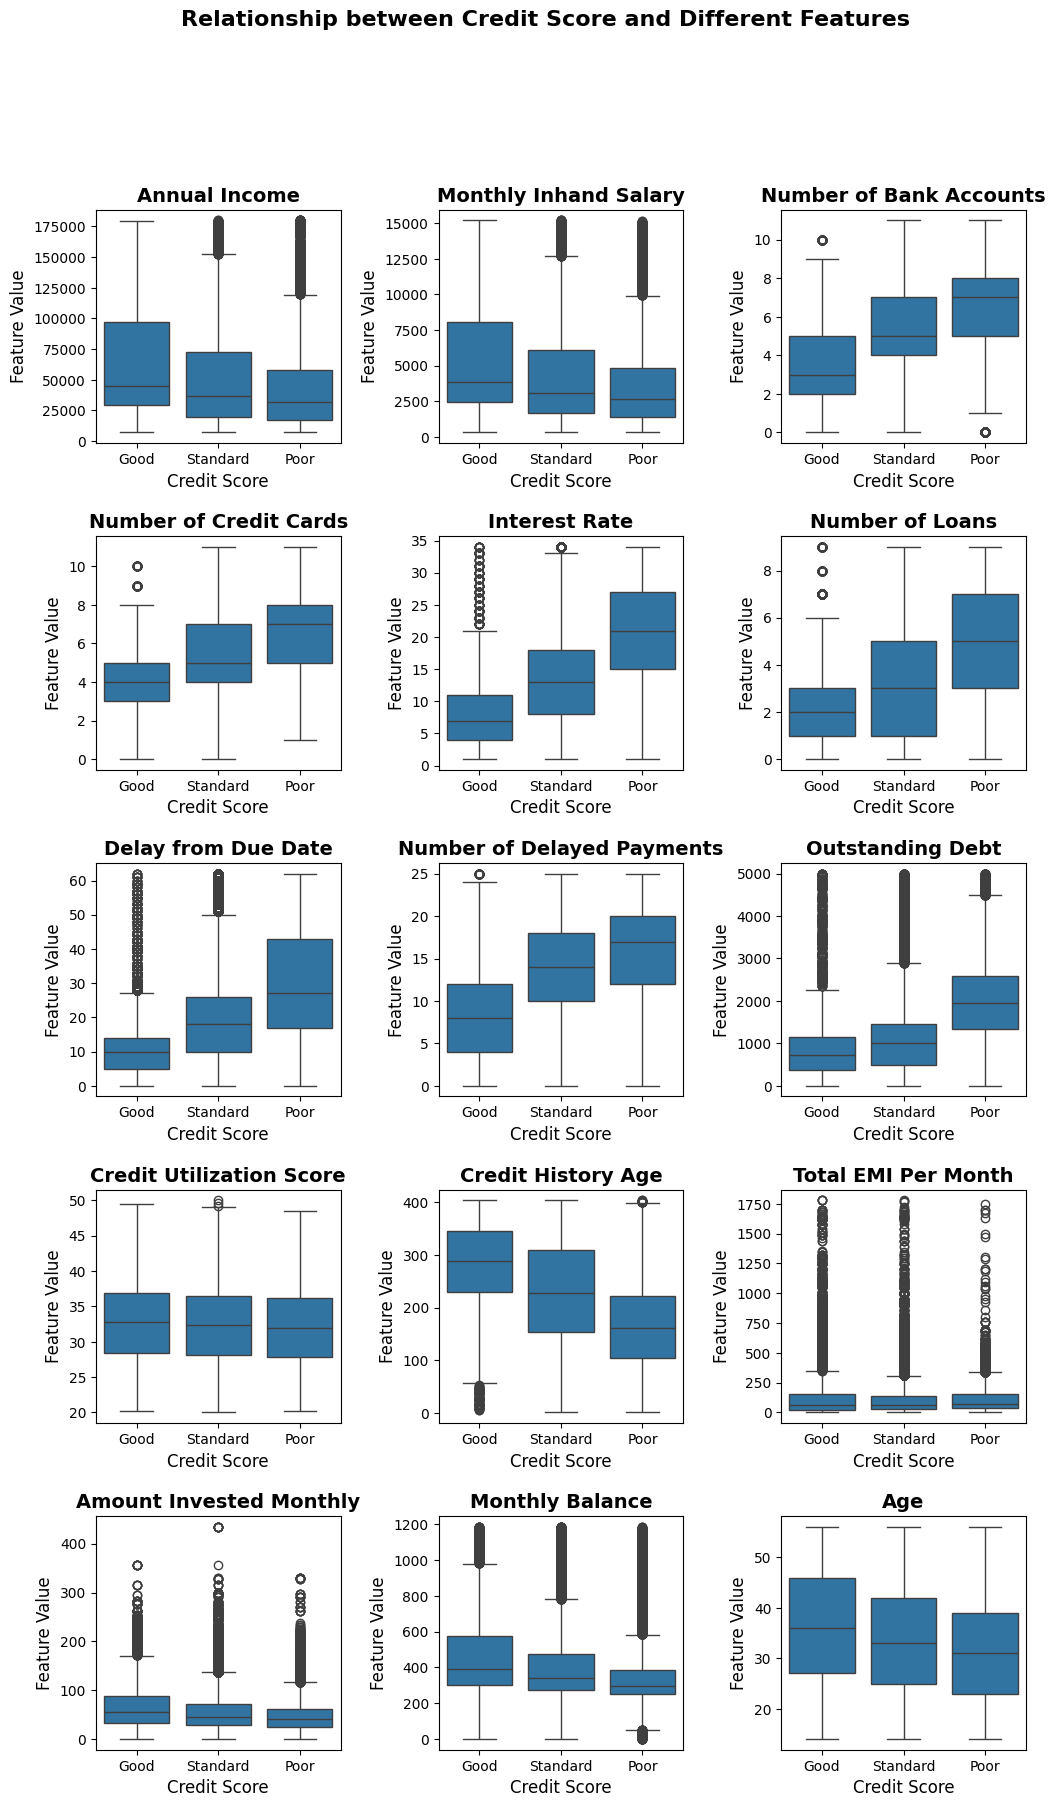

In [35]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Plot multiple box plots on the same axis
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=df, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=df, ax=ax[5])
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, ax=ax[6])
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, ax=ax[7])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, ax=ax[8])
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, ax=ax[9])
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, ax=ax[10])
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=df, ax=ax[11])
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df, ax=ax[12])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, ax=ax[13])
sns.boxplot(x='Credit_Score', y='Age', data=df, ax=ax[14])

# Add a title and labels
#plt.title('Relationship between Credit Score and Different Features')
plt.xlabel('Credit Score')
plt.ylabel('Feature Value')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a white grid
for i in range(15):
    ax[i].grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

# Add a title and labels
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')

# Set the font size for all subplot titles
titles = ['Annual Income', 'Monthly Inhand Salary', 'Number of Bank Accounts', 'Number of Credit Cards', 
          'Interest Rate', 'Number of Loans', 'Delay from Due Date', 'Number of Delayed Payments',
          'Outstanding Debt', 'Credit Utilization Score', 'Credit History Age', 'Total EMI Per Month',
          'Amount Invested Monthly', 'Monthly Balance', 'Age']
for i in range(15):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

    # Set the font size for all x and y labels
for i in range(15):
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

# Show the plot
plt.show()

Credit Score Classification Model

The Credit_Mix column is valuable for determining credit scores as it tells about the types of credits and loans you have taken.

Since the column is categorical, we faced many error for imputing the data and running any kind of alogrithm hence we have transformed it into a numerical feature so that we can use it to train a Machine Learning model for the task of credit score classification:

In [36]:
# Before transformation
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [37]:
#Transforming the column in 0, 1, or 2.
df['Credit_Mix'] = df['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [38]:
# After transformation
df['Credit_Mix'].unique()

array([2, 1, 0], dtype=int64)

In [39]:
# Importing train_test_split and splitting the data in X (features) and y(target)
from sklearn.model_selection import train_test_split

In [40]:
X = df[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", 
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Age", 
        "Monthly_Balance"]].values
y = df['Credit_Score'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier(n_estimators=300, class_weight='balanced')

In [44]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300)

In [45]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
predictions_dt = decision_tree_model.predict(X_test)

# Evaluation metrics for Decision Tree
print('\nDecision Tree Classifier:')
print('Classification Report', classification_report(y_test, predictions_dt))
print('Confusion Matrix', confusion_matrix(y_test, predictions_dt))
print('Accuracy Score', accuracy_score(y_test, predictions_dt))


Decision Tree Classifier:
Classification Report               precision    recall  f1-score   support

        Good       0.71      0.71      0.71      5866
        Poor       0.75      0.75      0.75      9633
    Standard       0.78      0.78      0.78     17501

    accuracy                           0.76     33000
   macro avg       0.74      0.74      0.74     33000
weighted avg       0.76      0.76      0.76     33000

Confusion Matrix [[ 4157   126  1583]
 [  109  7182  2342]
 [ 1606  2283 13612]]
Accuracy Score 0.756090909090909


In [46]:


# Initialize the Gradient Boosting Classifier
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gradient_boost.fit(X_train, y_train)

# Make predictions
predictions_gb = gradient_boost.predict(X_test)

# Evaluation metrics
print('Gradient Boosting Classifier:')
print('Classification Report', classification_report(y_test, predictions_gb))
print('Confusion Matrix', confusion_matrix(y_test, predictions_gb))
print('Accuracy Score', accuracy_score(y_test, predictions_gb))


Gradient Boosting Classifier:
Classification Report               precision    recall  f1-score   support

        Good       0.58      0.71      0.64      5866
        Poor       0.70      0.67      0.69      9633
    Standard       0.76      0.72      0.74     17501

    accuracy                           0.70     33000
   macro avg       0.68      0.70      0.69     33000
weighted avg       0.71      0.70      0.71     33000

Confusion Matrix [[ 4153   122  1591]
 [  732  6437  2464]
 [ 2253  2596 12652]]
Accuracy Score 0.7043030303030303


In [47]:
# Making predictions on our model using the test data
predictions = model.predict(X_test)

In [48]:


# Initialize the K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
predictions_knn = knn_model.predict(X_test)

# Evaluation metrics
print('K-Nearest Neighbors Classifier:')
print('Classification Report', classification_report(y_test, predictions_knn))
print('Confusion Matrix', confusion_matrix(y_test, predictions_knn))
print('Accuracy Score', accuracy_score(y_test, predictions_knn))


K-Nearest Neighbors Classifier:
Classification Report               precision    recall  f1-score   support

        Good       0.66      0.66      0.66      5866
        Poor       0.75      0.79      0.77      9633
    Standard       0.79      0.76      0.77     17501

    accuracy                           0.75     33000
   macro avg       0.73      0.74      0.73     33000
weighted avg       0.75      0.75      0.75     33000

Confusion Matrix [[ 3859   154  1853]
 [  236  7597  1800]
 [ 1775  2354 13372]]
Accuracy Score 0.7523636363636363


In [49]:
print('Classification Report', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix', confusion_matrix(y_test, predictions))
print('\n')
print('Accuracy Score', accuracy_score(y_test, predictions))

Classification Report               precision    recall  f1-score   support

        Good       0.78      0.76      0.77      5866
        Poor       0.80      0.82      0.81      9633
    Standard       0.82      0.81      0.82     17501

    accuracy                           0.81     33000
   macro avg       0.80      0.80      0.80     33000
weighted avg       0.81      0.81      0.81     33000



Confusion Matrix [[ 4431    23  1412]
 [   22  7943  1668]
 [ 1247  2006 14248]]


Accuracy Score 0.8067272727272727


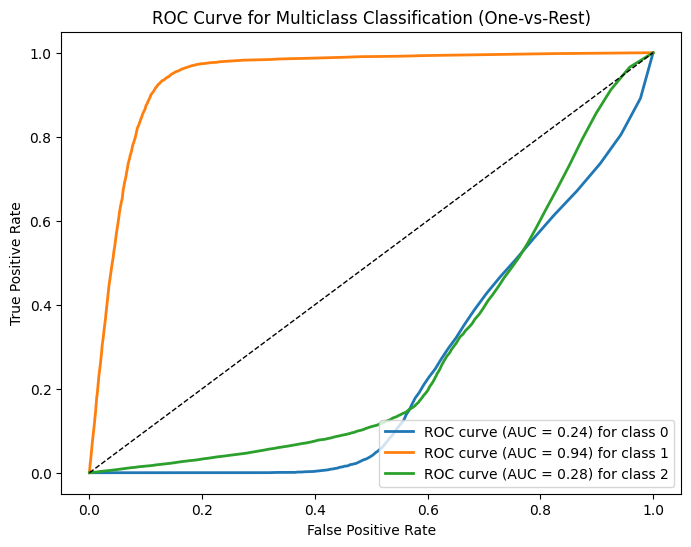

In [51]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (AUC = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

Classifying customers based on their credit scores helps banks and credit card companies immediately to issue loans to customers with good creditworthiness. A person with a good credit score will get loans from any bank and financial institution. 

